# **Regression Project: Boston House Price Prediction**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

### **Please read the instructions carefully before starting the project.** 

This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.

* Blanks '_______' are provided in the notebook that needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# Fill in the blank" or "# Complete the code". Running incomplete code may throw an error.
* Remove the blank and state your observations in detail wherever the mark down says 'Write your observations here:_________'
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final report.

In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install statsmodels

## **Importing the necessary libraries and overview of the dataset**

In [3]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [4]:
df = pd.read_csv("Boston.csv") ## Complete the code

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Write your observations here: Here we see the first five rows and samples of our dataset with 13 features**

### **Data Overview**

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [6]:
df.shape  # Complete the code

(506, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**Observations:**

- There are a total of **506 non-null observations in each of the columns**. This indicates that there are **no missing values** in the data.
- There are **13 columns** in the dataset and **every column is of numeric data type**.

In [9]:
df.duplicated().sum() ## Complete the code to check duplicate entries in the data

0

### **Summary Statistics of this Dataset**

In [10]:
df.describe() ## Complete the code to print the statistical summary of the data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**Write your observations here: This report provides a summary of a dataset containing 506 samples. The dataset encompasses various features, including mean, standard deviation (STD), minimum, maximum, and percentiles. Additionally, it highlights the significance of the 50th percentile as the median, which represents the middle value of the dataset. Number of Samples: The dataset consists of 506 samples.   Mean: for example, the mean value for the dataset CRIM is 3.613524. The mean provides a measure of the central tendency and represents the average value of the dataset. Minimum and Maximum: The specific numbers for the minimum and maximum values of the dataset are not provided. The minimum represents the smallest value observed in the dataset, while the maximum corresponds to the largest value. Percentiles: The 25th, 50th (median), and 75th percentiles divide the data into four equal parts. So, this statistical summary of the dataset with 506 samples highlights key statistical measures such as the mean, standard deviation, minimum, maximum, and percentiles. **

### Checking for missing values

In [11]:
df.isna().sum() ## Complete the code to check duplicate entries in the data

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
df.duplicated().sum()

0

## **Exploratory Data Analysis and Data Preprocessing**

### **Univariate Analysis**

**Let's check the distribution of the variables**

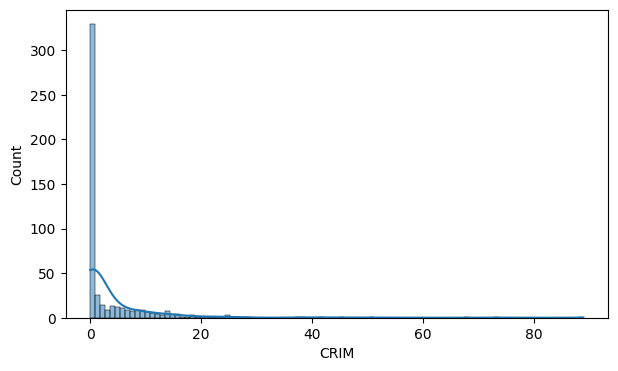

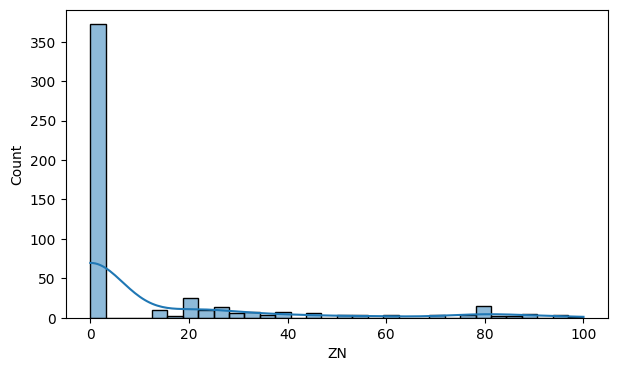

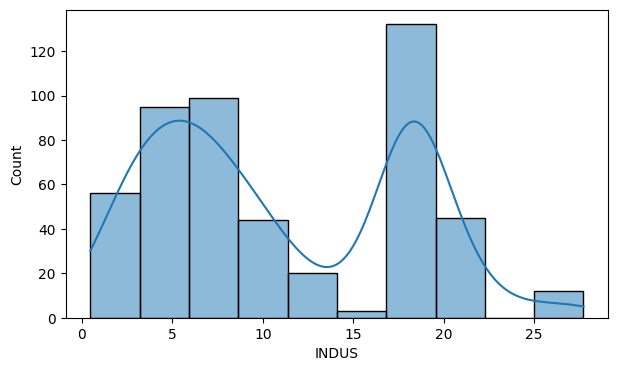

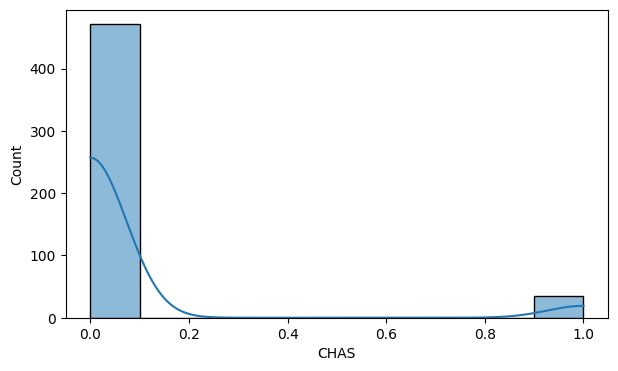

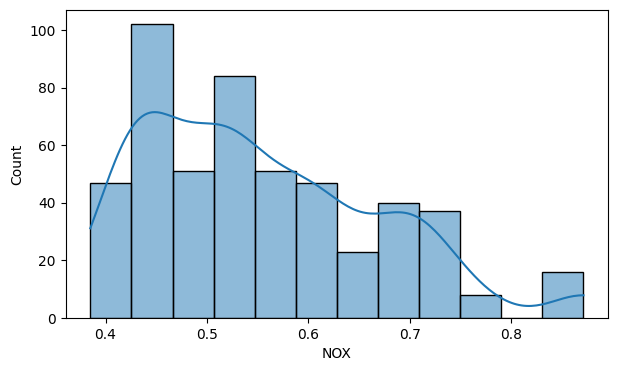

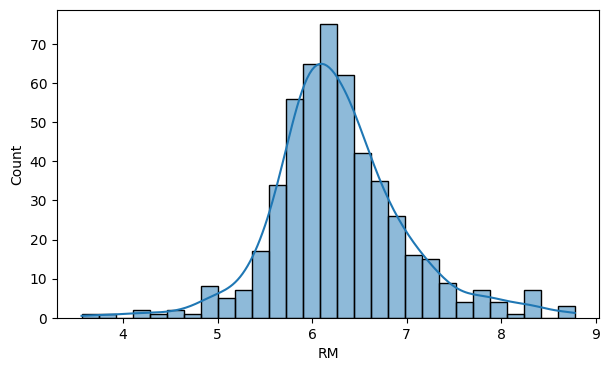

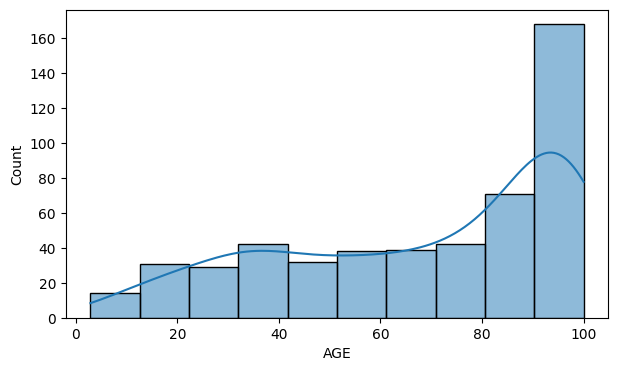

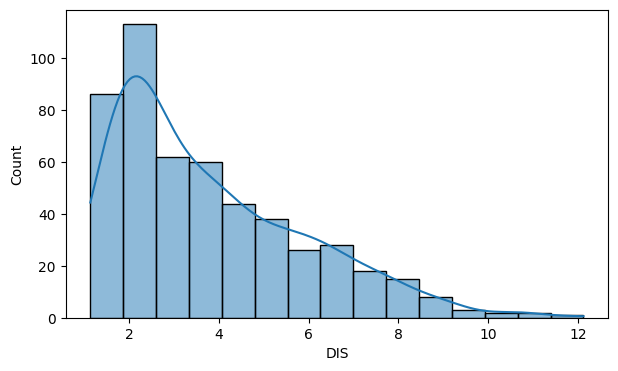

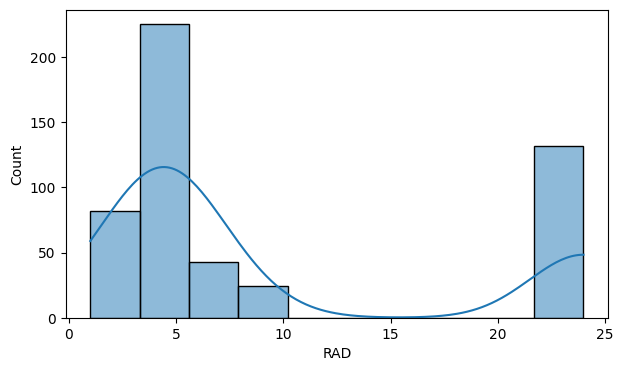

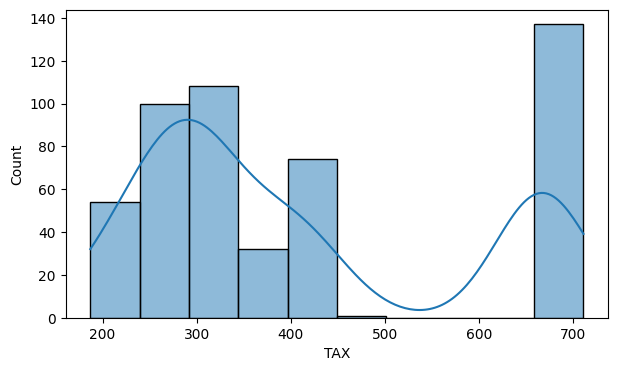

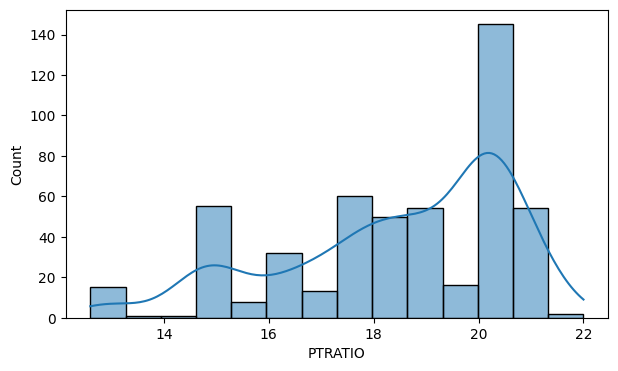

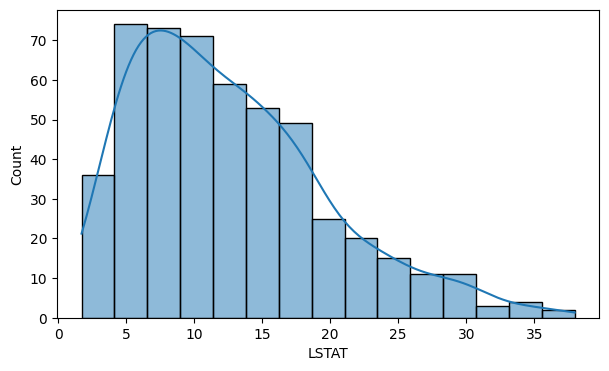

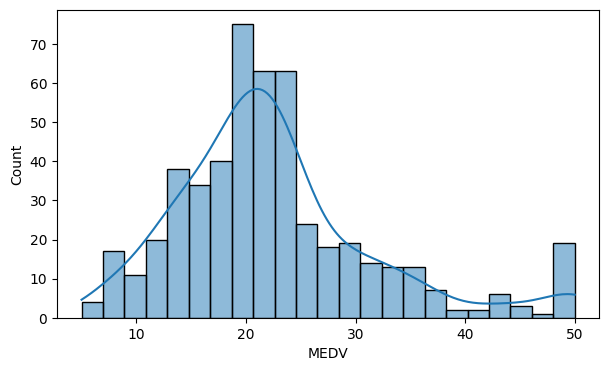

In [13]:
# Plotting all the columns to look at their distributions
for i in df.columns:
    
    plt.figure(figsize = (7, 4))
    sns.histplot(data = df, x = i, kde = True)
    plt.show()

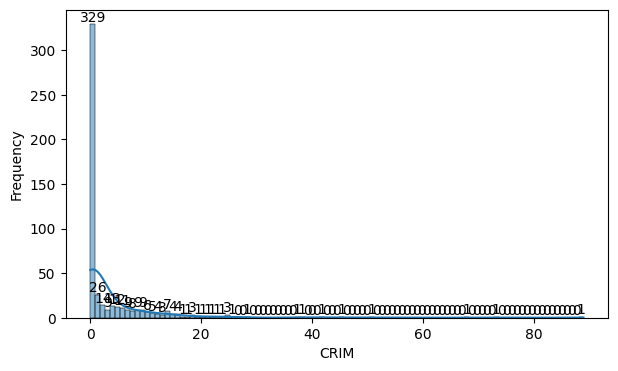

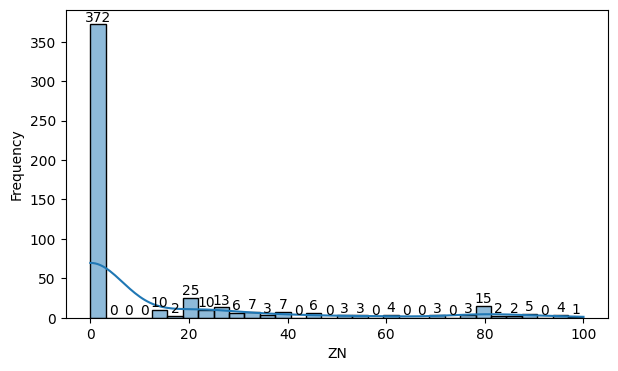

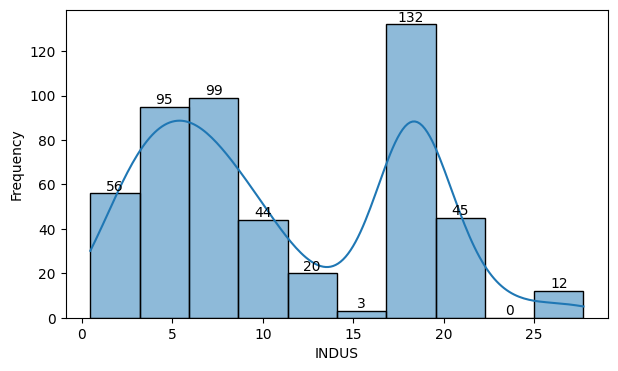

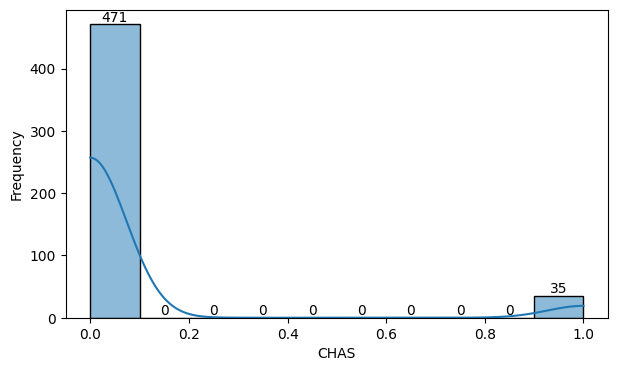

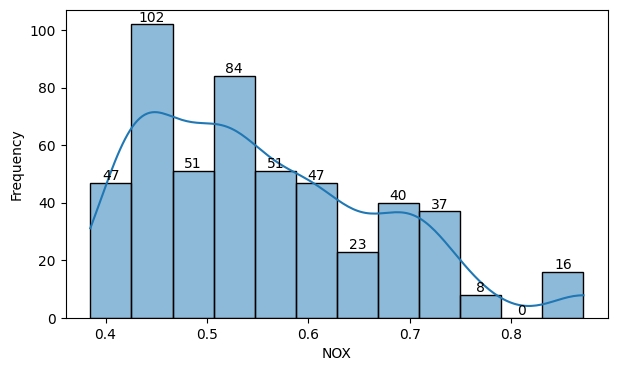

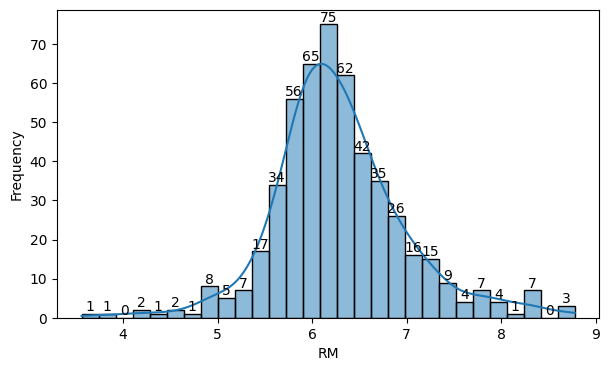

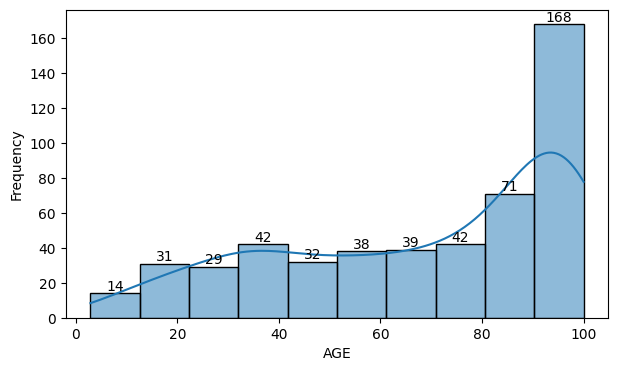

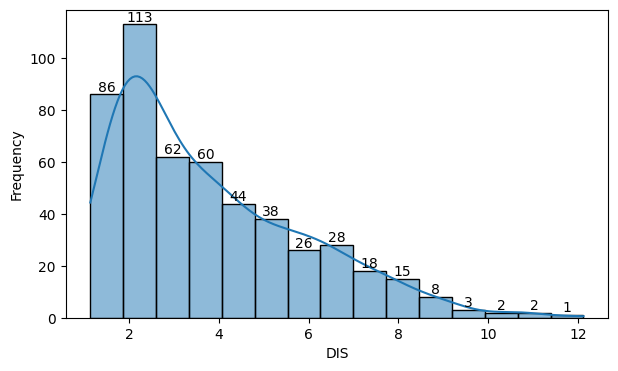

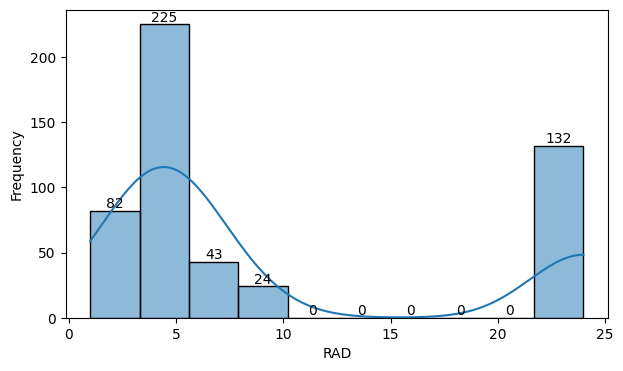

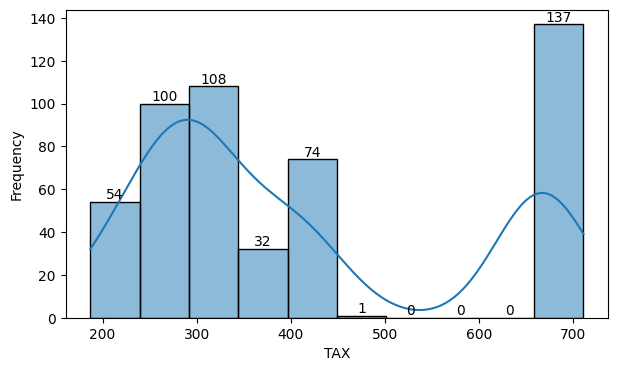

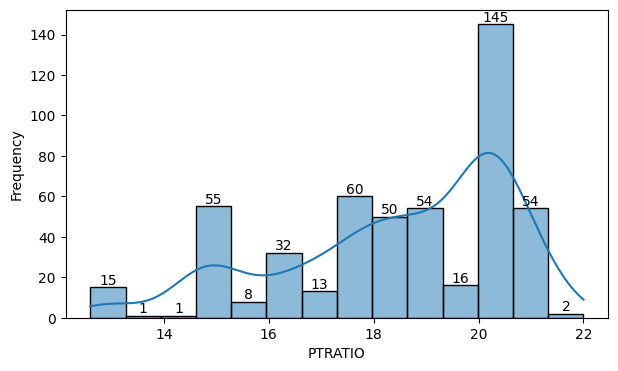

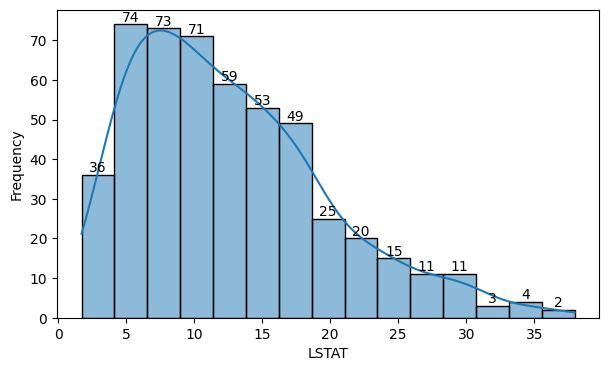

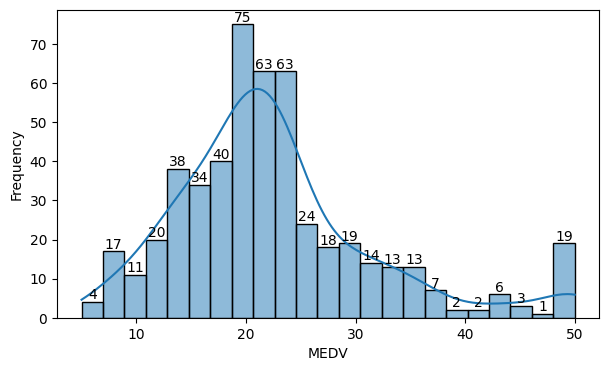

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in df.columns:
    plt.figure(figsize=(7, 4))
    ax = sns.histplot(data=df, x=i, kde=True)
    plt.xlabel(i)
    plt.ylabel('Frequency')

    # Adding exact values to each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

    plt.show()


**Write your observations here: 329 towns have a per capita crime rate (CRIM) nearing zero around 65% that can be a suitable report (no normal distribution). Around 73% of ZN are close to zero (no normal distribution). Between 17-19 for INDUS we have the maximum frequency of 132 (26%). Approximately 93% of tract does not tract bounds river (0) and 17% tract bounds river (1). 16 towns have a Nitric Oxide concentration of about 0.9 and 102 towns around102.  RM, the average number of rooms per dwelling curve is in a normal distribution shape and we can analyze it simply by central tendency rules and parametric statistical methods with mean of 6.2. AGE, proportion of owner-occupied units built before 1940, we the maximum frequency of RM in the range of 90-100. DIS, weighted distances to five Boston employment centers, at around DIS=2 we have the maximum frequency of 113. Also, for RAD, the max frequency of 225 at around 5. Also, 137 towns have a TAX of 700 with frequency of 137. And a maximum of for 145 frequencies for PTRATIO=21. LSTAT, lower status of the population lies in distance 4-11 with frequency of 70-74. MEDV, median value of owner-occupied homes in 1000 dollars lies 5-50 with maximum of 75 in frequency and value of 20000$ in a approximate shape of normal distribution. **

As the dependent variable is sightly skewed, we will apply a **log transformation on the 'MEDV' column** and check the distribution of the transformed column.

In [15]:
df['MEDV_log'] = np.log(df['MEDV'])

<AxesSubplot: xlabel='MEDV_log', ylabel='Count'>

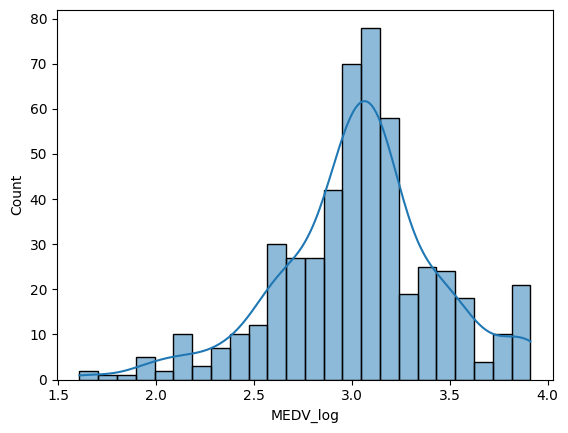

In [16]:
sns.histplot(data = df, x = 'MEDV_log', kde = True)

**Observation:**

- The log-transformed variable (**MEDV_log**) appears to have a **nearly normal distribution without skew**, and hence we can proceed.

Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.

### **Bivariate Analysis**

**Let's check the correlation using the heatmap**

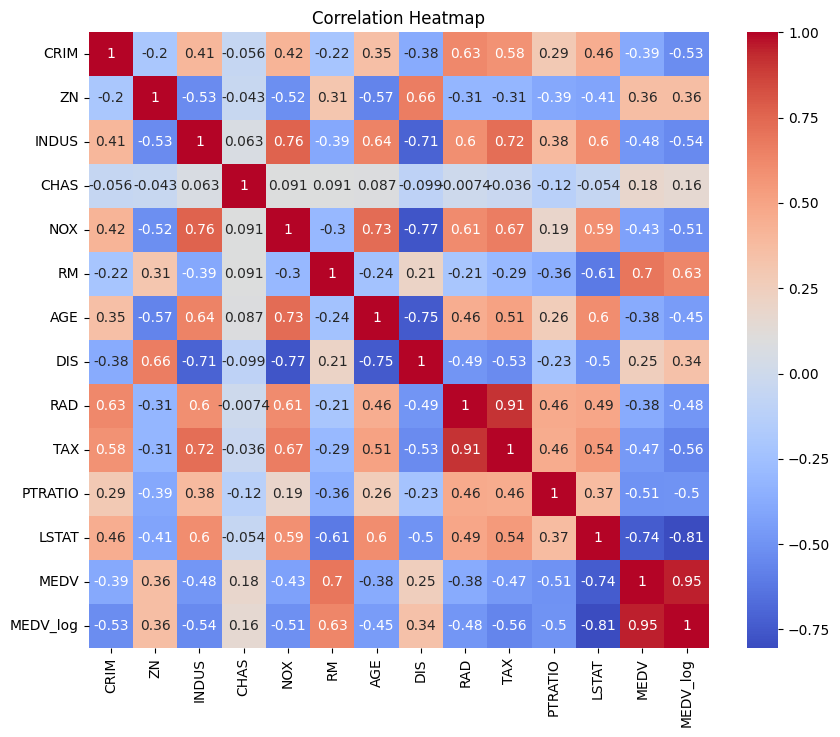

In [17]:
# plt.figure(figsize = (12, 8))
# cmap = sns.diverging_palette(230, 20, as_cmap = True)
# sns._______(_________, annot = True, fmt = '.2f', cmap = cmap) ## Complete the code
# plt.show()

# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Read the Excel file into a DataFrame
# df = pd.read_excel('your_file.xlsx')

# # Create a heatmap
# plt.figure(figsize=(12, 8))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# sns.heatmap(df, annot=True, fmt='.2f', cmap=cmap)
# plt.show()



plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # Plot the heatmap with correlations
plt.title('Correlation Heatmap')  # Add a title to the heatmap
plt.show()  # Display the heatmap



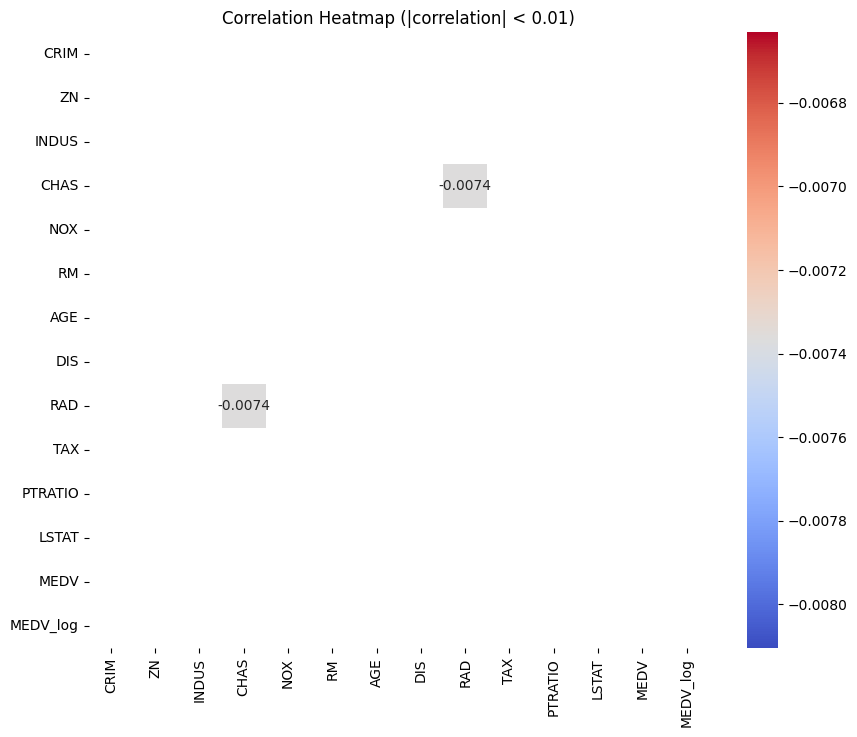

In [18]:
plt.figure(figsize=(10, 8))  # Set the size of the figure
corr_matrix = df.corr()  # Calculate the correlation matrix
mask = (corr_matrix < 0.01) & (corr_matrix > -0.01)  # Create a mask to filter correlations
sns.heatmap(corr_matrix[mask], annot=True, cmap='coolwarm')  # Plot the filtered heatmap
plt.title('Correlation Heatmap (|correlation| < 0.01)')  # Add a title to the heatmap
plt.show()  # Display the heatmap


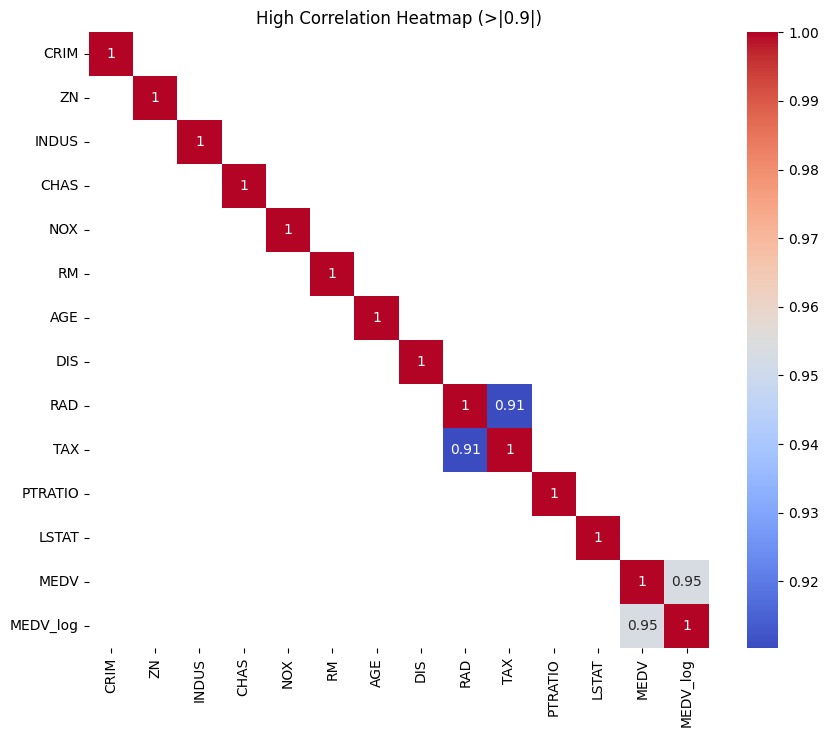

In [19]:
plt.figure(figsize=(10, 8))  # Set the size of the figure
correlation_matrix = df.corr()  # Calculate the correlation matrix

# Filter the correlation matrix for values greater than 0.9 or less than -0.9
high_correlation = correlation_matrix[(correlation_matrix > 0.9) | (correlation_matrix < -0.9)]

sns.heatmap(high_correlation, annot=True, cmap='coolwarm')  # Plot the heatmap with high correlation values
plt.title('High Correlation Heatmap (>|0.9|)')  # Add a title to the heatmap
plt.show()  # Display the heatmap


**Write your observations here: The correlation coefficient between the features RAD and TAX is approximately 0.91. This indicates a strong positive correlation between the two variables. The high correlation suggests that there is a strong linear relationship between RAD and TAX, with an increase in one feature corresponding to a significant increase in the other  Also RAD and CHAS have really the lowest relation with toghether**

Now, we will visualize the relationship between the pairs of features having significant correlations.

### **Visualizing the relationship between the features having significant correlations (>= 0.7 or <= -0.7)**

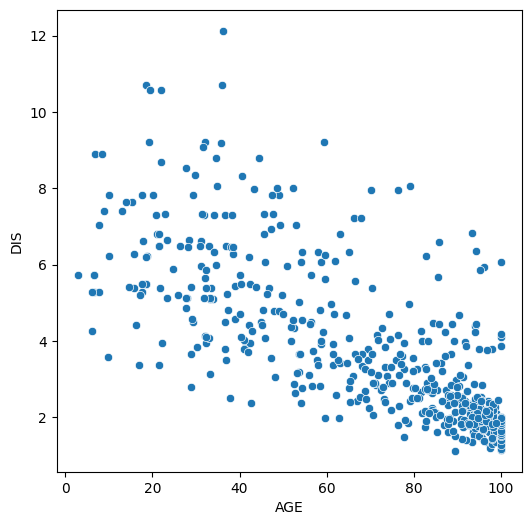

In [20]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'DIS', data = df)

plt.show()

**Observations:**
- The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

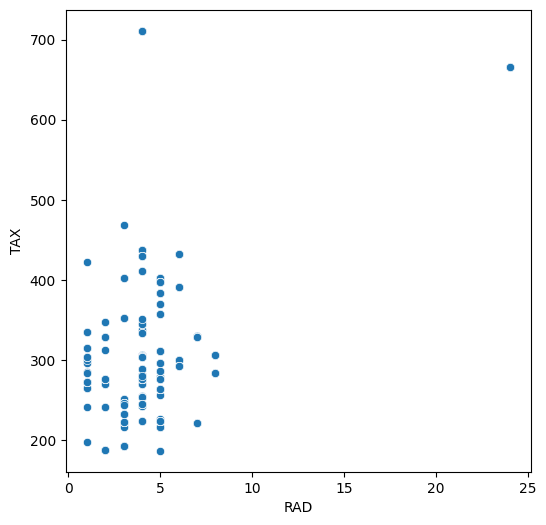

In [21]:
# Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RAD', y = 'TAX', data = df)

plt.show()

**Observations:**

- The correlation between RAD and TAX is very high. But, no trend is visible between the two variables. 
- The strong correlation might be due to outliers. 

Let's check the correlation after removing the outliers.

In [22]:
# Remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429202


**Observation:**

- So, the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.

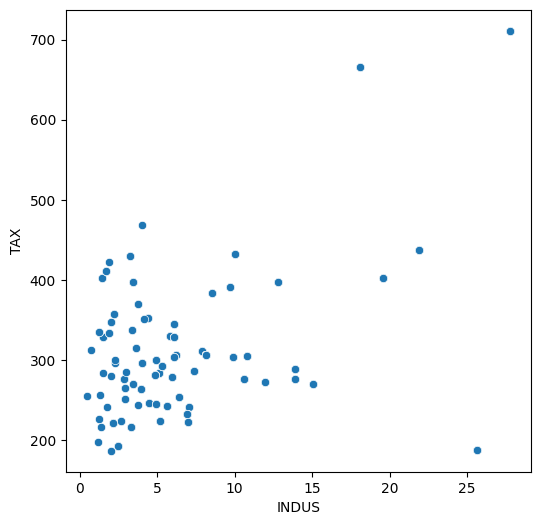

In [23]:
# Scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)

plt.show()

**Observations:**

- The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

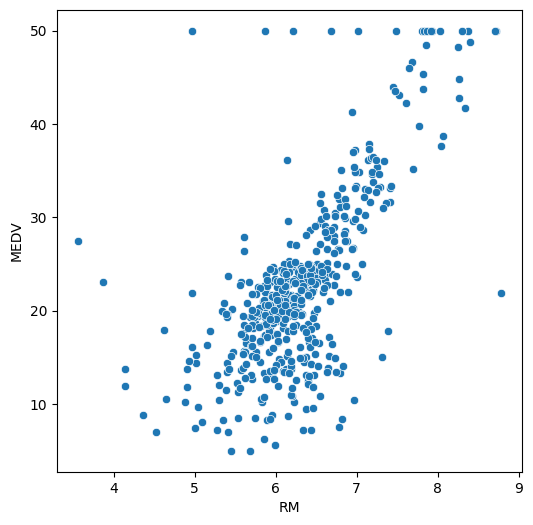

In [24]:
# Scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RM', y = 'MEDV', data = df)

plt.show()

**Observations:**

- The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

- There are a few outliers in a horizontal line as the MEDV value seems to be capped at 50.

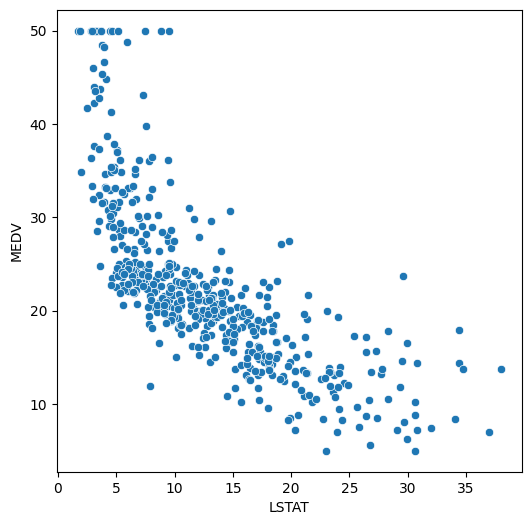

In [25]:
# Scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)

plt.show()

**Observations:**

- The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.
- There are few outliers and the data seems to be capped at 50.

- **Create a scatter plot to visualize the relationship between the remaining features having significant correlations (>= 0.7 or <= -0.7)**
    - INDUS and NOX
    - AGE and NOX
    - DIS and NOX
- **Write your observations from the plots**

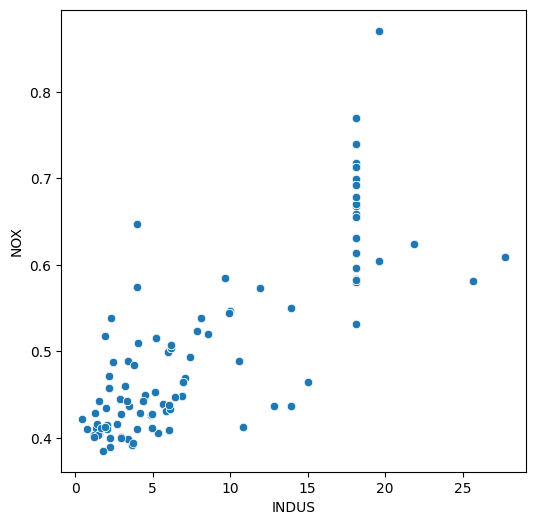

In [26]:
# Scatterplot to visulaize the relationship between INDUS and NOX 
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'NOX', data = df)

plt.show()

**Write your observations from the plots: The correlation coefficient between NOX and INDUS is approximately 0.67, indicating a moderate positive correlation between the two variables. This suggests that there is a tendency for NOX and INDUS to increase together, but the relationship is not as strong as in variables with higher correlation coefficients.**

In [27]:
# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between NOX and INDUS is', pearsonr(df1['NOX'], df1['INDUS'])[0])

The correlation between NOX and INDUS is 0.6746463091884297


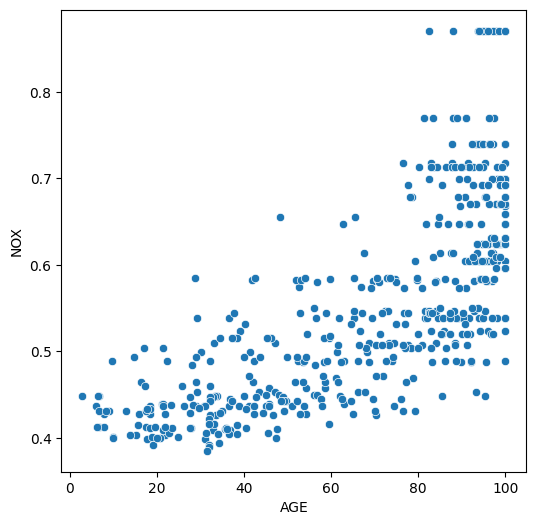

In [28]:
# Scatterplot to visulaize the relationship between AGE and NOX 
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'NOX', data = df)

plt.show()

- **Write your observations from the plots: The correlation coefficient between the features NOX and AGE is approximately 0.67, indicating a moderately positive correlation. This suggests that there is a tendency for NOX (nitric oxides concentration) and AGE (proportion of owner-occupied units built prior to 1940) to increase together, albeit not as strongly as in highly positively correlated variables. **

In [29]:
# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between NOX and AGE is', pearsonr(df1['NOX'], df1['AGE'])[0])

The correlation between NOX and AGE is 0.6671900067355683


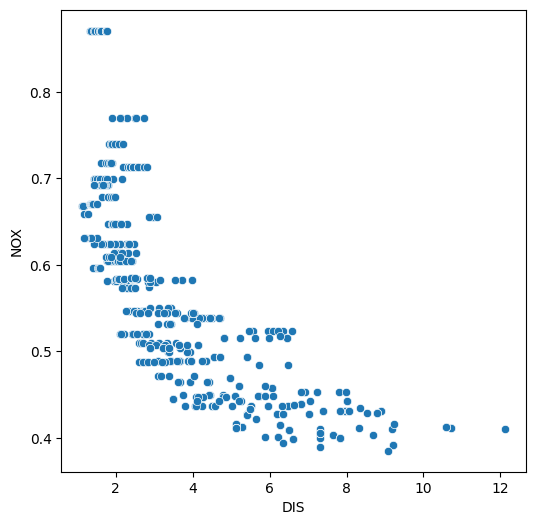

In [30]:
# Scatterplot to visulaize the relationship between DIS and NOX 
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'DIS', y = 'NOX', data = df)

plt.show()

- **Write your observations from the plots: The correlation coefficient between the features NOX and DIS is approximately -0.71, indicating a strong negative correlation. This suggests that as NOX (nitric oxides concentration) increases, the DIS (weighted distances to five Boston employment centers) decreases, or vice versa.**

In [31]:
# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between NOX and DIS is', pearsonr(df1['NOX'], df1['DIS'])[0])

The correlation between NOX and DIS is -0.7119379787469678


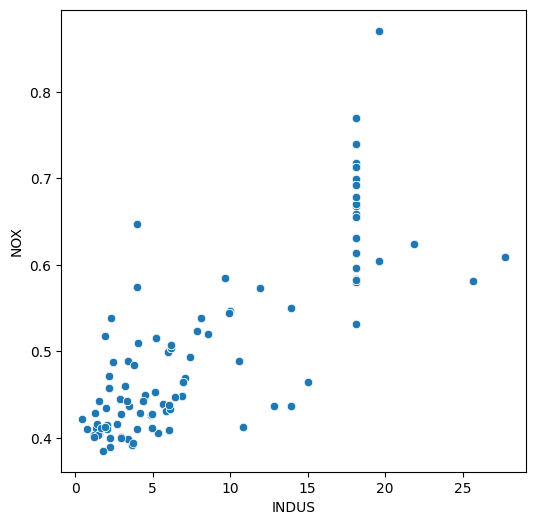

In [32]:
# Scatterplot to visualize the relationship between INDUS and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'NOX', data = df)

plt.show()

**Write your observations here: **Write your observations from the plots: The correlation coefficient between NOX and INDUS is approximately 0.67, indicating a moderate positive correlation between the two variables. This suggests that there is a tendency for NOX and INDUS to increase together, but the relationship is not as strong as in variables with higher correlation coefficients.****

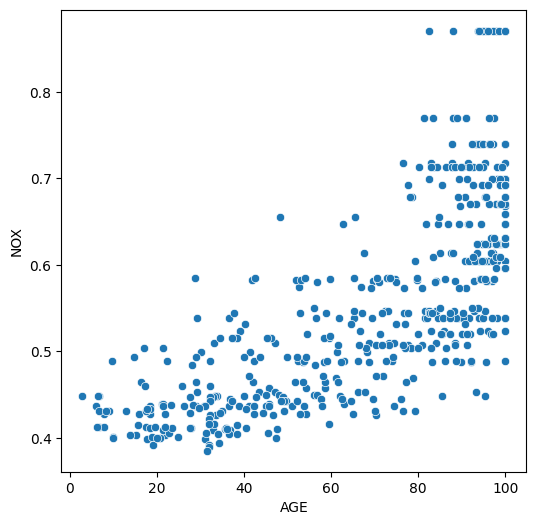

In [33]:
# Scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'NOX', data = df)

plt.show()

- **Write your observations from the plots: The correlation coefficient between the features NOX and AGE is approximately 0.67, indicating a moderately positive correlation. This suggests that there is a tendency for NOX (nitric oxides concentration) and AGE (proportion of owner-occupied units built prior to 1940) to increase together, albeit not as strongly as in highly positively correlated variables. **

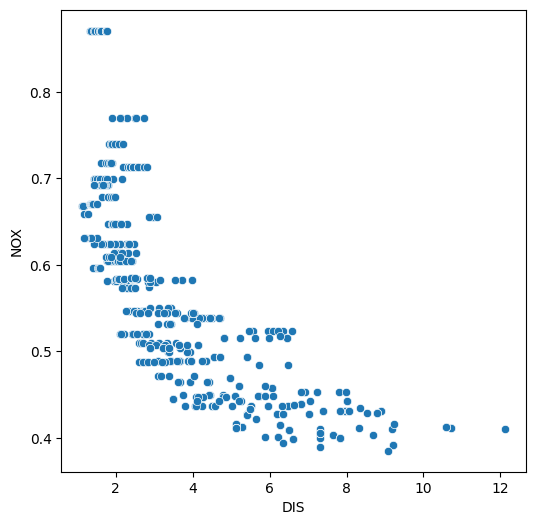

In [34]:
# Scatterplot to visualize the relationship between DIS and NOX
# Scatterplot to visulaize the relationship between DIS and NOX 
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'DIS', y = 'NOX', data = df)

plt.show()

- **Write your observations from the plots: The correlation coefficient between the features NOX and DIS is approximately -0.71, indicating a strong negative correlation. This suggests that as NOX (nitric oxides concentration) increases, the DIS (weighted distances to five Boston employment centers) decreases, or vice versa.**

We have seen that the variables LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant relationships among few independent variables, which is not desirable for a linear regression model. Let's first split the dataset.

### **Split the dataset**

Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test sets.

In [35]:
# Separate the dependent variable and indepedent variables
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log'})

# Add the intercept term
X = sm.add_constant(X)

In [36]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

Next, we will check the multicollinearity in the training dataset.

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


In [38]:
X.shape

(506, 13)

**Observations:**

- There are two variables with a high VIF - RAD and TAX (greater than 5). 
- Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

In [39]:
# Create the model after dropping TAX
# X_train = X_train.drop(______)  ## Complete the code

# # Check for VIF
# print(checking_vif(X_train))

# Create the model after dropping TAX
X_train = X_train.drop('TAX', axis=1)  # Drop the 'TAX' feature from X_train

# Check for VIF
print(checking_vif(X_train))




    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

**Hint:** Use the sm.OLS() model on the training data

In [40]:
# import statsmodels.api as sm
# X = sm.add_constant(X)

# # Create the model
# model1 = sm.OLS(Y, X)  # Write your code here
# results = model1.fit()

# # Get the model summary
# model1.summary()


import statsmodels.api as sm

# Define your dependent variable (y) and independent variables (X) based on your training data

# Add a constant term to the independent variables (X)
X = sm.add_constant(X)

# Create an instance of the sm.OLS() model
model1 = sm.OLS(Y, X)

# Fit the model to the training data
results = model1.fit()

# Obtain the summary of the OLS regression results
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     148.5
Date:                Mon, 17 Jul 2023   Prob (F-statistic):          4.58e-155
Time:                        09:56:53   Log-Likelihood:                 122.12
No. Observations:                 506   AIC:                            -218.2
Df Residuals:                     493   BIC:                            -163.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3311      0.198     21.862      0.0

**Write your observations here:The table presents the results of an OLS regression analysis for the dependent variable MEDV_log. Let's analyze and interpret each parameter statistically. R-squared: The R-squared value of 0.783 indicates that approximately 78.3% of the variance in MEDV_log can be explained by the independent variables included in the model. This suggests a reasonably good fit of the model to the data. Adjusted R-squared: The adjusted R-squared value of 0.778 takes into account the number of predictors and sample size, providing a more conservative estimate of the model's goodness of fit. The adjusted R-squared is slightly lower than the R-squared, which suggests that the additional predictors in the model do not contribute much to the overall explained variance. F-statistic: The F-statistic of 148.5 with a very low p-value (4.58e-155) indicates that the overall regression model is statistically significant. This suggests that at least one of the independent variables has a significant effect on the dependent variable. Log-Likelihood: The log-likelihood value of 122.12 represents the maximized log-likelihood of the model. It is used in the context of maximum likelihood estimation to compare models and assess their relative fit. Number of Observations: The number of observations is 506, indicating the sample size used in the analysis. AIC and BIC: The Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) are measures of the model's goodness of fit. Lower AIC and BIC values (such as the negative values in this case) indicate a better fit, considering the trade-off between model complexity and fit. Degrees of Freedom: The degrees of freedom represent the number of observations minus the number of estimated parameters. In this model, there are 12 estimated parameters, resulting in 493 degrees of freedom for residuals. Covariance Type: The regression analysis assumes a nonrobust covariance type, meaning that it does not take into account heteroscedasticity or other forms of nonconstant variance in the error term. It is important to interpret these statistical parameters in conjunction with the coefficients and their significance. Consider the magnitude, direction, and statistical significance of the coefficients to understand the relationship between the independent variables and the dependent variable. Additionally, assess the assumptions of the regression model, such as normality of residuals, absence of multicollinearity, and linearity of relationships. The table provides the coefficient estimates, standard errors, t-values, p-values, and confidence intervals for each variable in the regression model. Let's analyze and interpret each parameter statistically, const: The constant term in the model represents the estimated intercept when all independent variables are zero. In this case, it is estimated to be 4.3311 with a standard error of 0.198. The t-value of 21.862 indicates that the estimated intercept is significantly different from zero. The p-value of 0.000 further confirms the statistical significance. CRIM: The coefficient estimate for the variable 'CRIM' is -0.0109. This implies that, holding other variables constant, a one-unit increase in 'CRIM' is associated with an average decrease of 0.0109 in the dependent variable. The t-value of -8.203 suggests that this coefficient is statistically significant, and the p-value of 0.000 reinforces this observation. ZN: The coefficient estimate for 'ZN' is 0.0012. This indicates that, while holding other variables constant, a one-unit increase in 'ZN' is associated with a 0.0012 increase in the dependent variable. The t-value of 2.148 and the p-value of 0.032 suggest that this coefficient is statistically significant at a conventional significance level of 0.05. INDUS: The coefficient estimate for 'INDUS' is 0.0022. This implies that, holding other variables constant, a one-unit increase in 'INDUS' is associated with a 0.0022 increase in the dependent variable. The t-value of 0.863 and the relatively high p-value of 0.389 indicate that this coefficient is not statistically significant, meaning we fail to reject the null hypothesis that the coefficient is equal to zero. CHAS: The coefficient estimate for 'CHAS' is 0.1077. This suggests that, holding other variables constant, properties located along the Charles River have, on average, a 0.1077 higher dependent variable compared to those not along the river. The t-value of 3.084 and the p-value of 0.002 indicate that this coefficient is statistically significant. NOX: The coefficient estimate for 'NOX' is -0.8224. This implies that, holding other variables constant, a one-unit increase in 'NOX' is associated with an average decrease of 0.8224 in the dependent variable. The t-value of -5.320 and the p-value of 0.000 indicate that this coefficient is statistically significant. RM: The coefficient estimate for 'RM' is 0.0841. This suggests that, holding other variables constant, a one-unit increase in 'RM' is associated with an average increase of 0.0841 in the dependent variable. The t-value of 4.986 and the p-value of 0.000 indicate that this coefficient is statistically significant. AGE: The coefficient estimate for 'AGE' is 0.0003. This implies that, holding other variables constant, a one-unit increase in 'AGE' is associated with a very small increase of 0.0003 in the dependent variable. The t-value of 0.636 and the relatively high p-value of 0.525 suggest that this coefficient is not statistically significant. DIS: The coefficient estimate for 'DIS' is -0.0498. This indicates that, holding other variables constant, a one-unit increase in 'DIS' is associated with an average decrease of 0.0498 in the dependent variable. The t-value of -6.149 and the p-value of 0.000 indicate that this coefficient is statistically significant.   RAD: The coefficient estimate for 'RAD' is 0.0135. This implies that, holding other variables constant, a one-unit increase in 'RAD' is associated with an average increase of 0.0135 in the dependent variable. The t-value of 5.038 and the p-value of 0.000 suggest that this coefficient is statistically significant. TAX: The coefficient estimate for 'TAX' is -0.0006. This indicates that, holding other variables constant, a one-unit increase in 'TAX' is associated with an average decrease of 0.0006 in the dependent variable. The t-value of -4.203 and the p-value of 0.000 indicate that this coefficient is statistically significant. PTRATIO: The coefficient estimate for 'PTRATIO' is -0.0376. This suggests that, holding other variables constant, a one-unit increase in 'PTRATIO' is associated with an average decrease of 0.0376 in the dependent variable. The t-value of -7.085 and the p-value of 0.000 indicate that this coefficient is statistically significant. LSTAT: The coefficient estimate for 'LSTAT' is -0.0302. This implies that, holding other variables constant, a one-unit increase in 'LSTAT' is associated with an average decrease of 0.0302 in the dependent variable. The t-value of -14.876 and the p-value of 0.000 indicate that this coefficient is statistically significant. Overall, the regression model shows statistically significant coefficients for several variables, such as 'CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', and 'LSTAT'. However, 'INDUS' and 'AGE' do not appear to have a statistically significant relationship with the dependent variable. The adjusted R-squared of 0.778 suggests that approximately 77.8% of the variance in the dependent variable is explained by the model. The presence of multicollinearity is indicated by the condition number, which is large (1.17e+04). It is important to consider these statistical findings in conjunction with domain knowledge to draw meaningful conclusions and make accurate predictions using the model.**

### **Examining the significance of the model**

It is not enough to fit a multiple regression model to the data, it is necessary to check whether all the regression coefficients are significant or not. Significance here means whether the population regression parameters are significantly different from zero. 

From the above it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

In [41]:
# Create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame
Y = df['MEDV_log']

X = df.drop(['MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS'], axis=1) # Complete the code

X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

# Create the model
model2 = sm.OLS(y_train, X_train).fit()  ## Complete the code

# Get the model summary
model2.summary()

# import statsmodels.api as sm
# from sklearn.model_selection import train_test_split

# # Create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame
# Y = df['MEDV_log']

# X = df.drop(['MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS'], axis=1) # Complete the code

# X = sm.add_constant(X)

# # Splitting the data in 70:30 ratio of train to test data
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# # Create the model
# model2 = sm.OLS(y_train, X_train).fit()  ## Complete the code

# # Get the model summary
# model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 17 Jul 2023   Prob (F-statistic):          2.61e-104
Time:                        09:56:53   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.000       4.174       5.125
CRIM          -0.0125      0.002     -7.349      0.000      -0.016      -0.009
CHAS           0.1198      0.039      3.093      0.002       0.044       0.196
NOX           -1.0562      0.168     -6.296      0.000      -1.386      -0.726
RM             0.0589      0.020      2.928      0.004       0.019       0.098
DIS           -0.0441      0.008     -5.561      0.000      -0.060      -0.028
RAD            0.0078      0.002      3.890      0.000       0.004       0.012
PTRATIO       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
LSTAT         -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
X.shape

(506, 9)

In [44]:
Y.shape

(506,)

Now, we will check the linear regression assumptions.

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **1. Check for mean residuals**

In [45]:
residuals =model2.resid  ## Complete the code
np.mean(residuals)

-4.228883407922489e-15

In [46]:
residuals.shape

(354,)

**Write your observations here:"mean of our residuals is near to 0" that is an assumption in linear regression models. Residuals are the differences between observed and predicted values. This assumption means that, on average, the model should neither overestimate nor underestimate the actual values. Calculating the mean of residuals helps assess if the model is unbiased. If the mean is close to zero, the model is considered unbiased; otherwise, further investigation is needed. It is important to note that this assumption applies specifically to linear regression models. So it look likes good **

### **2. Check for homoscedasticity**

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [47]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [48]:
residuals.shape

(354,)

In [49]:
X.shape

(506, 9)

In [50]:
X_train.shape

(354, 9)

In [51]:
# name = ["F statistic", "p-value"]

# test = sms.het_goldfeldquandt(,) ## Complete the code

# lzip(name, test)



name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, X_train)  # Replace X_train with the appropriate variable

result = list(zip(name, test))
print(result)


[('F statistic', 1.0835082923425288), ('p-value', 0.30190120067668275)]


In [55]:
# name = ["F statistic", "p-value"]
# X = X[:354, :]  # Adjusting the shape of X to match the number of observations in residuals
# test = sms.het_goldfeldquandt(residuals, X)
# result = list(zip(name, test))


name = ["F statistic", "p-value"]
X = X.iloc[:354, :]  # Adjusting the shape of X to match the number of observations in residuals
test = sms.het_goldfeldquandt(residuals, X)
result = list(zip(name, test))
print(result)

[('F statistic', 1.0807384233850745), ('p-value', 0.3076991186860184)]


**Write your observations here: According to evidence p-value>0.05, We can not reject the Null hypothesis that is still residuals are homoscedastic**

### **3. Linearity of variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

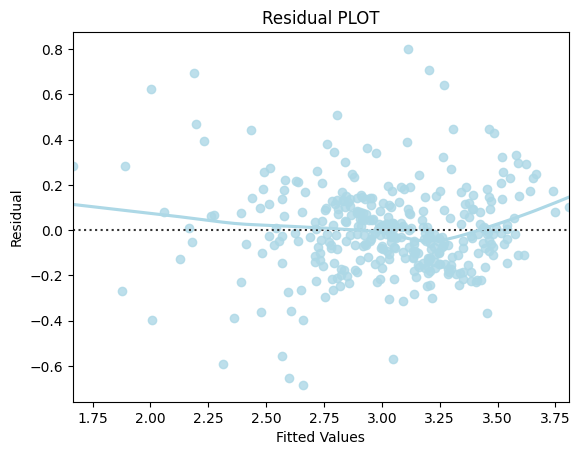

In [56]:
# Predicted values
fitted = model2.fittedvalues
# sns.set_style("whitegrid")
sns.residplot(x=fitted, y=residuals, color = "lightblue", lowess = True)  ## Complete the code
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()


**Write your observations here: Here, it suggests that the linearity assumption holds, and the model adequately captures the linear relationship between the predictors and the response. The scattered points represent the residuals, which are the differences between the observed values and the predicted values. Each point corresponds to an observation in our dataset. The vertical distance between a point and the horizontal line at 0 represents the magnitude of the residual for that observation. Solid Line (Lowess Smoothing). The solid line in the plot is a non-parametric smooth line (usually fitted using the Lowess method) that represents the general trend or pattern in the residuals. It helps visualize any non-linear patterns or relationships that may exist between the predictors and the response variable. Ideally, we want to see a relatively horizontal line centered around 0, indicating that the model captures the linear relationship well. Broken Line (Zero Residual Line), the broken line at 0 represents the zero residual line. It serves as a reference line indicating the expected residual value when the predicted value is exactly equal to the observed value. The residuals should be randomly scattered around this line, indicating that the model's predictions are unbiased.**

### **4. Normality of error terms**

The residuals should be normally distributed.

In [57]:
# Plot histogram of residuals

## Complete the code

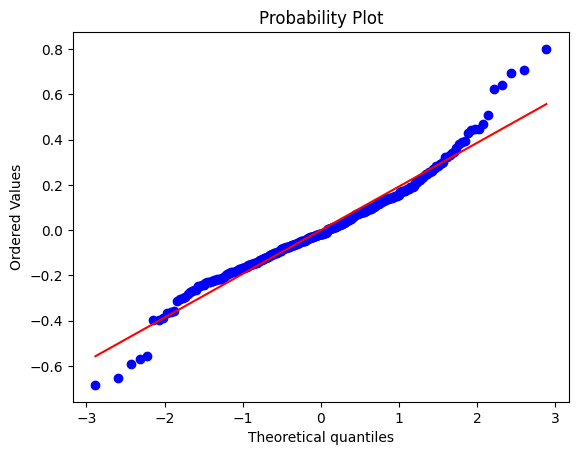

In [58]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Write your observations here: This results indicate that the errors in the regression model are approximately normally distributed. This is an important assumption for many statistical tests and model interpretations. However, if there are substantial deviations from normality, it may be necessary to consider alternative modeling approaches or transformations to address the issue.**

### **Check the performance of the model on the train and test data set**

In [59]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)  

    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965


**Write your observations here: The model output shows similar performance on both the train and test datasets -that is good-, with slightly higher errors observed in the test dataset. The RMSE and MAE values indicate the magnitude of the prediction errors, while the MAPE provides a relative measure of the errors as a percentage of the actual values. Lower values of RMSE, MAE, and MAPE indicate better model performance. However, it is important to consider the context and domain-specific requirements when interpreting these metrics and assessing the model's suitability for the task at hand.**

### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

In [60]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


### Get model coefficients in a pandas DataFrame with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs.

In [61]:
coef = model2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,4.649386
1,CRIM,-0.012500
2,CHAS,0.119773
3,NOX,-1.056225
4,RM,0.058907
5,DIS,-0.044069
6,RAD,0.007848
7,PTRATIO,-0.048504
8,LSTAT,-0.029277


### Conclusions and Business Recommendations

**Write Conclusions here: It is very important to apply some techniques like VIF, heatmap, and obtaining p-value to finding the indpendent variables to build an excellent regression model. After removing some feature, it look likes that we have small errors. Also, we can use PCA for this aim to going ahead without any removing, or consulting with the related specialist to help more about these removing and droping. Moreover sometimes the last coefficient of variables can be useful for better analysis of labels like MEDV. The magnitude of the coefficients represents the strength of the relationship. Larger coefficients indicate a stronger impact on the output. Negative coefficients indicate a negative relationship, where an increase in the feature value leads to a decrease in the predicted output.Positive coefficients indicate a positive relationship, where an increase in the feature value leads to an increase in the predicted output.The coefficients indicate the weights assigned to each feature in the model. They represent the importance or contribution of each feature in predicting the output.After normalizing the dataset, we can analyze the effects of the coefficients more accurately and understand how they are influenced.**

**Write Business Recommendations here: Crime Rate, efforts should be made to reduce the crime rate in the area, as it has a negative impact on the median value of homes. Implementing effective security measures and community policing initiatives may help improve the desirability of the area. Proximity to Charles River, properties located near the Charles River tend to have higher median values. Promoting the riverfront and developing amenities in the area can attract potential buyers and increase property values. Environmental Factors, attention should be given to reducing the nitric oxide concentration and maintaining good air quality in the area, as it has a negative impact on home values. Implementing measures to control pollution and promote environmental sustainability can help improve property values. Property Features, properties with a higher number of rooms tend to have higher median values. Encouraging the construction of spacious dwellings or promoting renovation and expansion of existing properties can increase their value. Accessibility, areas with better accessibility to employment centers and radial highways tend to have higher median values. Improving transportation infrastructure and connectivity can enhance the desirability of the area for potential homebuyers. Education, maintaining a low pupil-teacher ratio is important, as it positively influences property values. Adequate funding and resources should be allocated to ensure a favorable educational environment and attract families seeking quality education for their children. Socioeconomic Status, efforts should be made to uplift the socioeconomic status of the population, as areas with a higher percentage of lower-status residents tend to have lower median values. Implementing social and economic development programs can help improve living conditions and property values in these areas.**